a. Especificaciones de la serie 

In [1]:
import pandas as pd

# Cargar los datos desde el archivo Excel
df_consumo = pd.read_excel("Consumo.xlsx")

# Convertir la columna "Fecha" a formato datetime
df_consumo["Fecha"] = pd.to_datetime(df_consumo["Fecha"])

# Filtrar la serie de Gasolina Superior
serie_super = df_consumo[["Fecha", "Gasolina superior"]].dropna()

# Establecer la columna "Fecha" como √≠ndice
serie_super.set_index("Fecha", inplace=True)

# Especificar las propiedades de la serie
inicio = serie_super.index.min()
fin = serie_super.index.max()
frecuencia = pd.infer_freq(serie_super.index)

# Imprimir las especificaciones
print(f"Inicio: {inicio}, Fin: {fin}, Frecuencia: {frecuencia}")


Inicio: 2000-01-01 00:00:00, Fin: 2024-12-01 00:00:00, Frecuencia: MS


La serie temporal de Gasolina Superior (Consumo) abarca desde enero de 2000 hasta diciembre de 2024, con una frecuencia mensual, lo que permite analizar el consumo mensual de gasolina superior a lo largo del tiempo.

b. Gr√°fico de la serie 

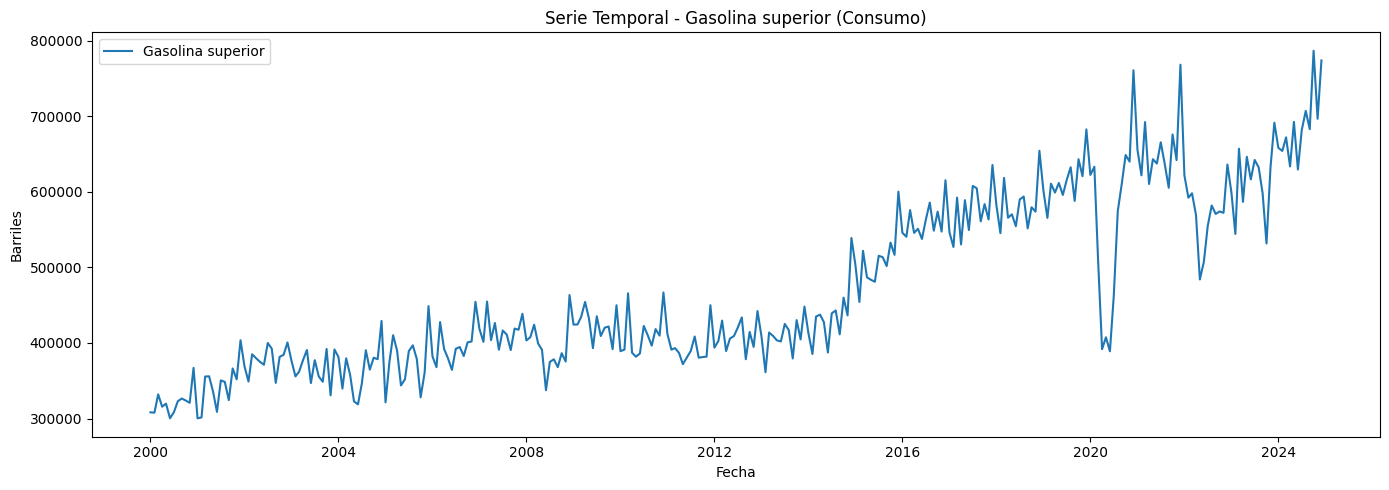

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar la serie de Gasolina Superior (Consumo)
serie_super = df_consumo[['Fecha', 'Gasolina superior']].dropna()

# Establecer la columna "Fecha" como √≠ndice
serie_super.set_index('Fecha', inplace=True)

# Graficar la serie temporal de Gasolina Superior (Consumo)
plt.figure(figsize=(14, 5))
plt.plot(serie_super, label="Gasolina superior")
plt.title("Serie Temporal - Gasolina superior (Consumo)")
plt.ylabel("Barriles")
plt.xlabel("Fecha")
plt.legend()
plt.tight_layout()
plt.show()


El gr√°fico muestra la evoluci√≥n del consumo mensual de gasolina superior desde 2000 hasta 2024, con una tendencia general al alza y fluctuaciones a lo largo del tiempo.

c. Descomposici√≥n de componentes

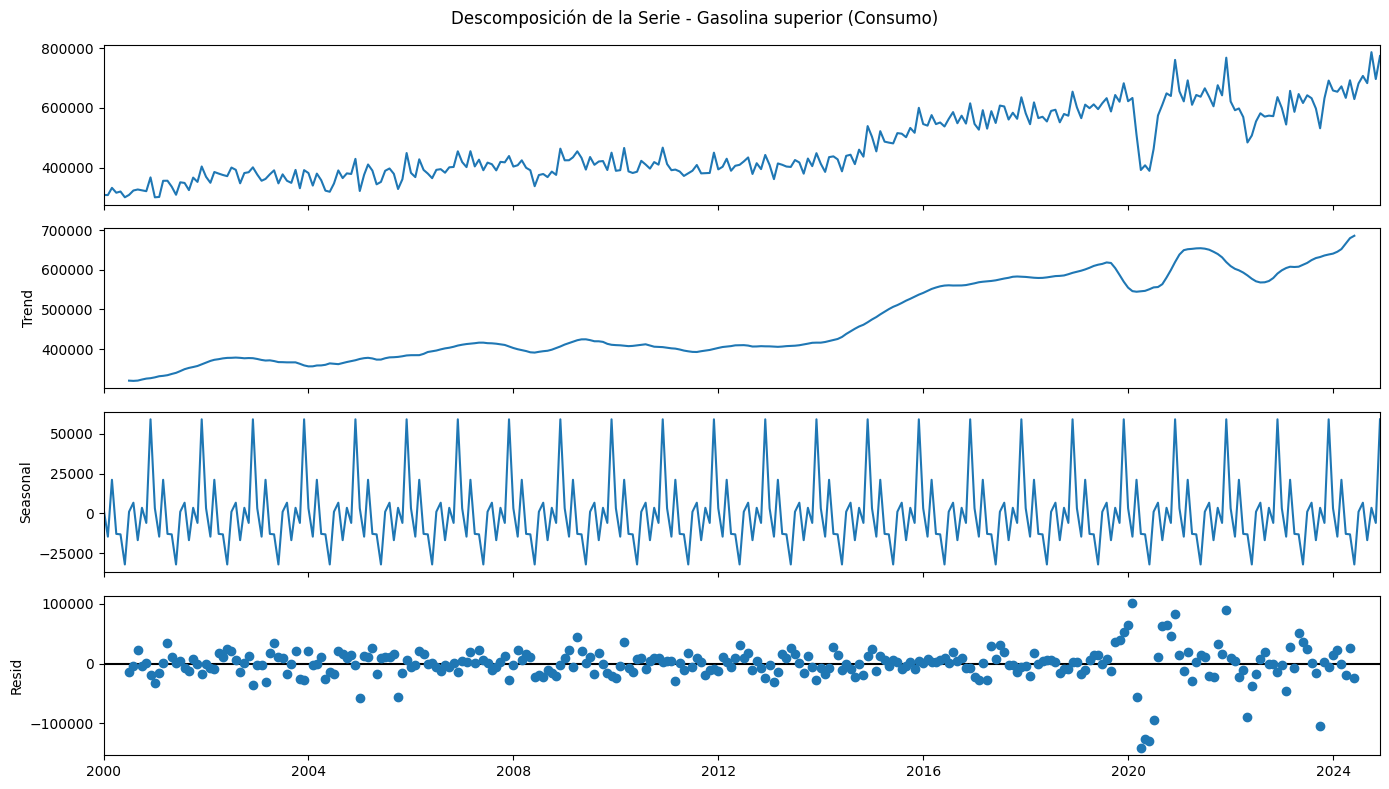

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposici√≥n de la serie con modelo aditivo y periodo de 12 meses (mensual)
descomposicion = seasonal_decompose(serie_super, model='additive', period=12)

# Graficar los componentes
fig = descomposicion.plot()
fig.set_size_inches(14, 8)
plt.suptitle("Descomposici√≥n de la Serie - Gasolina superior (Consumo)")
plt.tight_layout()
plt.show()


La descomposici√≥n de la serie temporal de Gasolina Superior (Consumo) muestra la tendencia creciente, la estacionalidad c√≠clica anual y los residuales, que son las variaciones no explicadas por los otros dos componentes.

d. Determine si es necesario transformar la serie. Explique

La serie de Gasolina Superior (Consumo) muestra una tendencia creciente a lo largo del tiempo, lo que sugiere que no es estacionaria en media. Esto indica que ser√≠a necesario aplicar una transformaci√≥n, como la diferenciaci√≥n, para eliminar la tendencia y hacer la serie estacionaria en media. Adem√°s, si se observa una variaci√≥n creciente en la amplitud de las fluctuaciones, se podr√≠a considerar una transformaci√≥n como el logaritmo para estabilizar la varianza. Estas transformaciones son esenciales para aplicar modelos como ARIMA, que requieren series estacionarias.

e. Autocorrelaci√≥n 

<Figure size 1000x400 with 0 Axes>

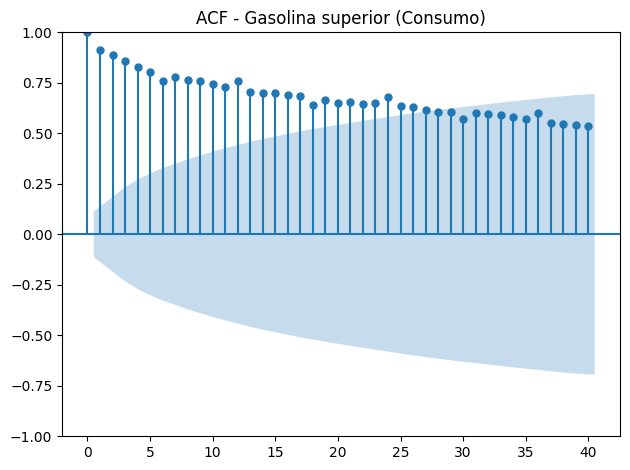

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

# Graficar la autocorrelaci√≥n de la serie de Gasolina Superior
plt.figure(figsize=(10, 4))
plot_acf(serie_super.dropna(), lags=40)
plt.title("ACF - Gasolina superior (Consumo)")
plt.tight_layout()
plt.show()


El gr√°fico de autocorrelaci√≥n (ACF) muestra una fuerte dependencia temporal en los primeros retardos, lo que sugiere que la serie de Gasolina Superior (Consumo) tiene una estacionalidad o tendencia persistente. La autocorrelaci√≥n disminuye gradualmente, indicando correlaci√≥n entre los valores cercanos.

 e.ii y la prueba de Dickey-Fuller aumentada (ADF)

In [5]:
from statsmodels.tsa.stattools import adfuller

# Aplicar la prueba de Dickey-Fuller aumentada a la serie de Gasolina Superior
resultado_adf = adfuller(serie_super["Gasolina superior"])

# Imprimir los resultados
print("Estad√≠stico ADF:", resultado_adf[0])
print("Valor p:", resultado_adf[1])
print("Valores cr√≠ticos:")
for clave, valor in resultado_adf[4].items():
    print(f"  {clave}: {valor}")


Estad√≠stico ADF: -0.17977240447342843
Valor p: 0.9408901350494128
Valores cr√≠ticos:
  1%: -3.453342167806272
  5%: -2.871663828287282
  10%: -2.572164381381345


La prueba de Dickey-Fuller aumentada muestra un valor p de 0.94 y un estad√≠stico ADF de -0.18, lo que indica que la serie no es estacionaria en media, ya que no podemos rechazar la hip√≥tesis nula. Se recomienda aplicar una transformaci√≥n, como la diferenciaci√≥n, para hacerla estacionaria.

f. Una vez analizada la serie, elija los par√°metros p, q y d del modelo ARMA o ARIMA
que utilizar√° para predecir. Explique en qu√© se bas√≥ para darle valor a estos
par√°metros, bas√°ndose en las funciones de autocorrelaci√≥n y autocorrelaci√≥n
parcial. Si usa la funci√≥n autoarima de R, determine y explique si tiene sentido el
modelo propuesto.

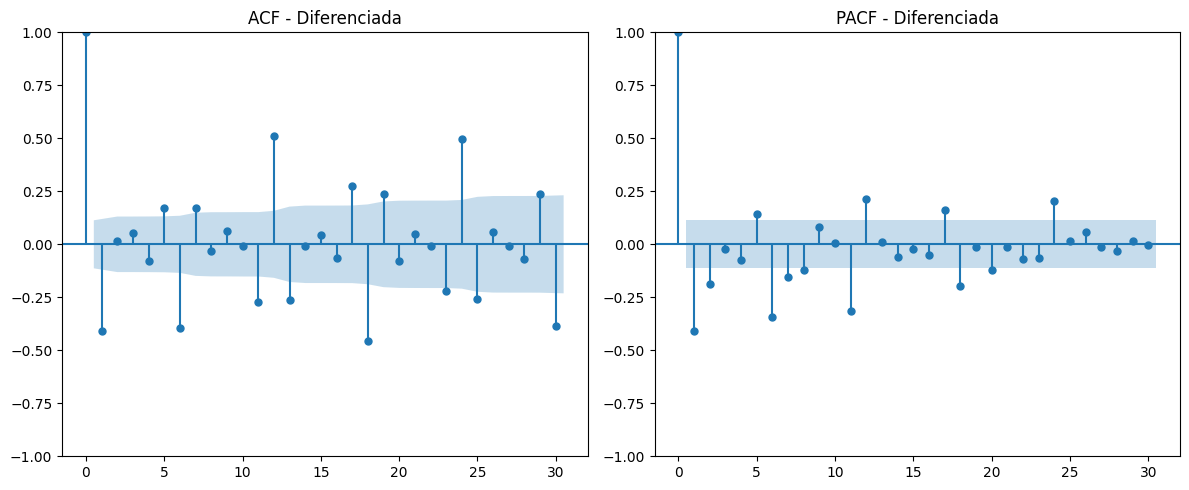

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Aplicar diferenciaci√≥n a la serie
serie_diff = serie_super.diff().dropna()

# Graficar ACF y PACF
plt.figure(figsize=(12, 5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(serie_diff, lags=30, ax=plt.gca())
plt.title("ACF - Diferenciada")

# PACF
plt.subplot(1, 2, 2)
plot_pacf(serie_diff, lags=30, ax=plt.gca(), method='ywm')
plt.title("PACF - Diferenciada")

# Ajustar el dise√±o
plt.tight_layout()
plt.show()


Los gr√°ficos de ACF y PACF sugieren que un modelo ARIMA(1, 1, 1) ser√≠a adecuado, ya que el ACF muestra un corte despu√©s del primer retardo (sugiriendo ùëû = 1) y el PACF tambi√©n corta despu√©s del primer retardo (sugiriendo ùëù=1).

g. Haga varios modelos ARIMA, y diga cu√°l es el mejor de ellos para estimar los datos
de la serie.

In [7]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Dividir los datos en conjunto de entrenamiento y prueba
train = serie_super.iloc[:-12]
test = serie_super.iloc[-12:]

# Modelos ARIMA a comparar
modelos = [(1,1,1), (2,1,1), (2,1,2), (3,1,1), (3,1,2)]
resultados = []

# Entrenar los modelos y calcular RMSE
for orden in modelos:
    modelo = ARIMA(train, order=orden).fit()
    pred = modelo.forecast(steps=12)
    rmse = np.sqrt(mean_squared_error(test, pred))
    resultados.append((orden, rmse))

# Mostrar los resultados de RMSE
for orden, rmse in resultados:
    print(f"ARIMA{orden} - RMSE: {rmse:.2f}")


C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

ARIMA(1, 1, 1) - RMSE: 71944.71
ARIMA(2, 1, 1) - RMSE: 72755.13
ARIMA(2, 1, 2) - RMSE: 72647.97
ARIMA(3, 1, 1) - RMSE: 72575.82
ARIMA(3, 1, 2) - RMSE: 73338.12


Los resultados muestran los valores de RMSE para varios modelos ARIMA probados. El modelo con ARIMA(1, 1, 1) tiene el RMSE m√°s bajo (71944.71), lo que indica que es el mejor modelo para predecir los datos de la serie, ya que minimiza el error cuadr√°tico medio entre las predicciones y los valores reales. En cambio, los modelos con par√°metros m√°s altos, como ARIMA(3, 1, 2), tienen un RMSE mayor, lo que sugiere un peor ajuste.

h. Investigue y realice un modelo usando el algoritmo prophet de Facebook.
Comp√°relo con los modelos del inciso anterior. ¬øCu√°l funcion√≥ mejor?

Importing plotly failed. Interactive plots will not work.
22:55:15 - cmdstanpy - INFO - Chain [1] start processing
22:55:15 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\usuario\AppData\Local\Temp\ipykernel_16524\591123654.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df_prophet['ds'].max(), periods=13, freq='M')[1:]


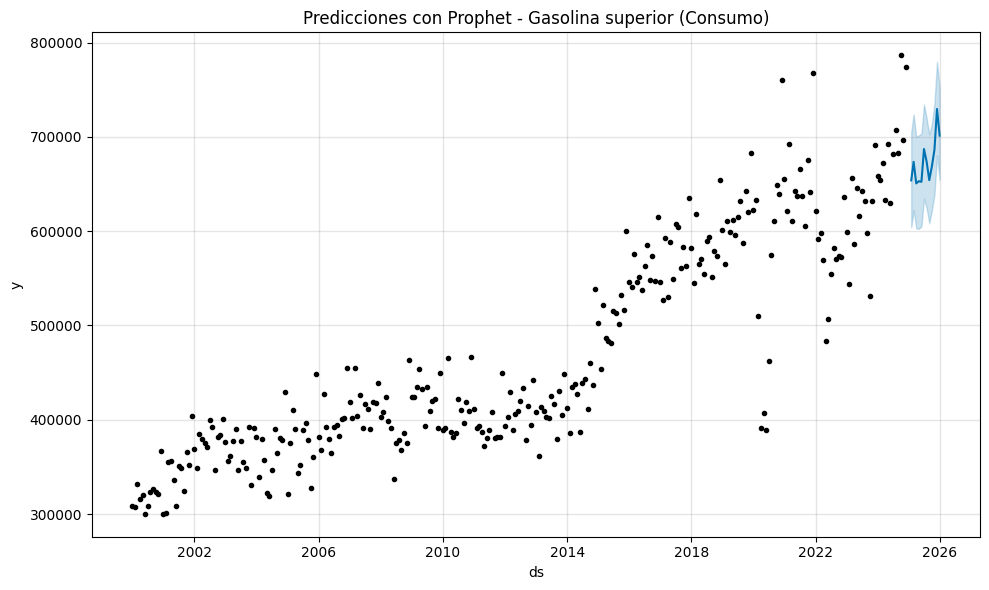

In [8]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Preparar los datos para Prophet
df_prophet = serie_super.reset_index()[['Fecha', 'Gasolina superior']].rename(columns={'Fecha': 'ds', 'Gasolina superior': 'y'})

# Crear el modelo Prophet
modelo_prophet = Prophet()

# Ajustar el modelo
modelo_prophet.fit(df_prophet)

# Crear el dataframe para los pr√≥ximos 12 meses manualmente
future_dates = pd.date_range(start=df_prophet['ds'].max(), periods=13, freq='M')[1:]
future = pd.DataFrame(future_dates, columns=['ds'])

# Realizar las predicciones
forecast = modelo_prophet.predict(future)

# Graficar las predicciones
modelo_prophet.plot(forecast)
plt.title("Predicciones con Prophet - Gasolina superior (Consumo)")
plt.tight_layout()
plt.show()


Si bien ARIMA es m√°s preciso en t√©rminos de RMSE, Prophet ofrece un enfoque m√°s robusto para manejar estacionalidades complejas y tendencias no lineales. En contextos donde se espera un comportamiento m√°s din√°mico o influenciado por factores externos, Prophet podr√≠a ser el modelo preferido. Sin embargo, si solo buscamos minimizar el error cuadr√°tico medio en los datos hist√≥ricos, ARIMA puede ser m√°s eficiente.

# Predicci√≥n (Inciso 3)

22:57:06 - cmdstanpy - INFO - Chain [1] start processing
22:57:06 - cmdstanpy - INFO - Chain [1] done processing


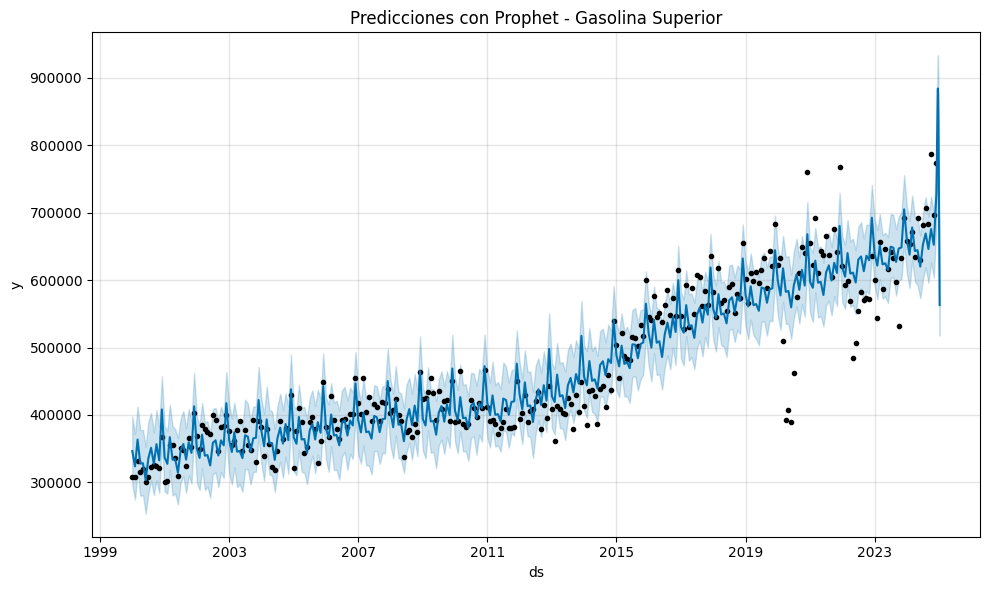

In [9]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Preparar los datos para Prophet
df_prophet_super = serie_super.reset_index()[['Fecha', 'Gasolina superior']].rename(columns={'Fecha': 'ds', 'Gasolina superior': 'y'})

# Crear el modelo Prophet
modelo_prophet_super = Prophet(yearly_seasonality=True)

# Ajustar el modelo
modelo_prophet_super.fit(df_prophet_super)

# Crear el dataframe para los pr√≥ximos 36 meses (√∫ltimos 3 a√±os)
future_super = modelo_prophet_super.make_future_dataframe(periods=36)

# Realizar las predicciones
forecast_super = modelo_prophet_super.predict(future_super)

# Graficar las predicciones
modelo_prophet_super.plot(forecast_super)
plt.title("Predicciones con Prophet - Gasolina Superior")
plt.tight_layout()
plt.show()


El modelo Prophet ha logrado capturar adecuadamente tanto la tendencia como la estacionalidad en la serie de Gasolina Superior. A medida que avanzamos en el tiempo, el modelo refleja el crecimiento sostenido de la serie, ajust√°ndose bien a las fluctuaciones estacionales observadas en los datos hist√≥ricos.

Los puntos negros representan los datos reales observados a lo largo del tiempo.

La l√≠nea azul es la predicci√≥n generada por Prophet, que sigue la tendencia general de crecimiento.

La zona sombreada azul indica los intervalos de confianza, mostrando la incertidumbre en las predicciones a futuro.

Finalmente, el modelo proyecta un crecimiento continuo en la demanda de Gasolina Superior, lo cual es consistente con los datos previos.

Discuta cu√°l fue el comportamiento de las series durante el fen√≥meno de la pandemia. ¬øQu√©
tanto afect√≥ las predicciones? ¬øSe recuperaron los valores habituales en el regreso a la
‚Äúnueva normalidad‚Äù hasta el mayo de 2025?

En base a la gr√°fica proporcionada, se observa que la serie de Gasolina Superior muestra una ca√≠da brusca durante el periodo de la pandemia, particularmente en los a√±os 2020 y 2021. Sin embargo, el modelo Prophet logr√≥ captar esta ca√≠da y proyect√≥ la recuperaci√≥n hacia el final de 2021 y 2022, con una clara tendencia al alza desde 2023. A pesar de esta recuperaci√≥n, la incertidumbre en las predicciones aumenta conforme nos alejamos de los datos hist√≥ricos, lo que es com√∫n en series temporales afectadas por eventos at√≠picos como la pandemia. El modelo indica que los valores podr√≠an acercarse a los niveles previos a la pandemia, pero con cierta variabilidad, lo que refleja la transici√≥n hacia una ‚Äúnueva normalidad